# Disaster Tweets data analysis

In [85]:
import re
import string
import numpy as np
import pandas as pd
import scipy as sp
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import validators as vld

In [86]:
df_train = pd.read_csv('./train.csv')
df_train.sample(n=10)

,id,keyword,location,text,target
5588,7973,razed,NaN,The Latest: More Homes Razed by Northern Calif...,1
2182,3126,debris,NaN,#??? #?? #??? #??? MH370: Aircraft debris foun...,1
325,471,armageddon,"Florida, USA",Vladimir Putin Issues Major Warning But Is It ...,1
5694,8126,rescued,Earth,Migrants Rescued After Boat Capsizes Off Libya...,1
5397,7699,panicking,?^åá??åá?^?? ??,OKAY I CAN'T FIND IT SO I'M KINDA PANICKING,0
4089,5814,hail,Paradise City,@FaZe_Rain all hail the Cloud,0
754,1088,blew%20up,NaN,i hate people who tweet 'receipts' but KNOW it...,0
6964,9989,tsunami,but i love kaylen ??,I hope this tsunami clears b4 i have to walk o...,1
2535,3639,desolation,Singapore,@KaiSeiw And then there's people like me where...,0
3488,4985,explosion,On the toilet having a dump,@lordRsBiscuits That's always good for a prett...,1


In [87]:
df_train.fillna(value={'keyword': '', 'location': ''}, inplace=True)
df_train.sample(n=10)

,id,keyword,location,text,target
2999,4307,dust%20storm,,How to Survive a Dust Storm http://t.co/0yL3yT...,1
5260,7521,oil%20spill,,Refugio oil spill may have been costlier bigge...,1
3882,5520,flattened,"Frome, Somerset, England",Zouma has just absolutely flattened that guy ??,0
5508,7861,quarantined,,Fucking yes /r/antiPOZi is quarantined. Trigg...,0
4800,6832,loud%20bang,Kenya,matako_3: Breaking news! Unconfirmed! I just h...,0
5335,7614,pandemonium,,World Class Tgirl Ass 02 - Scene 4 - Pandemoni...,0
3862,5493,flames,"Hillsville/Lynchburg, VA",@Flames_Nation that's the optimistic side of m...,0
5603,7994,razed,,The Latest: More Homes Razed by Northern Calif...,1
413,599,arsonist,Atlanta,#NOWPLAYING Arsonist MC - So Impressed - @AR...,0
4240,6024,hazardous,,http://t.co/rOdpt33XFM EverSafe Emergency Auto...,1


In [88]:
PUNCTUATION = set(string.punctuation)
STOP_WORDS = set(nltk.corpus.stopwords.words('english'))
LEMM = nltk.WordNetLemmatizer()

def is_not_stopword(word):
    return word not in STOP_WORDS

def is_not_number(token):
    return not token.isdigit()

def is_not_url(token):
    return not vld.url(token)

def remove_punctuation(input):
    return ''.join([c for c in input if c not in PUNCTUATION])

def tokenize(input):
    return nltk.word_tokenize(input.lower())

def clean_text(input):
    tokens = re.split('\\s+', input.lower())
    tokens = filter(is_not_url, tokens)
    tokens = filter(is_not_stopword, tokens)
    tokens = map(remove_punctuation, tokens)
    tokens = filter(is_not_number, tokens)
    tokens = map(LEMM.lemmatize, tokens)
    return ' '.join(tokens)


df_train['clean_text'] = df_train['text'].apply(lambda txt: clean_text(txt))


In [89]:
def move_target_rigth(df):
    target = df['target']
    df = df.drop(['target'], axis=1)
    df['target'] = target
    return df

df_train['tokenized'] = df_train['text'].apply(lambda txt: tokenize(txt))
df_train['text_length'] = df_train['text'].apply(lambda txt: len(txt)-txt.count(' '))
df_train['upper_text_length'] = df_train['text'].apply(lambda txt: sum(1 for c in txt if c.isupper()))
df_train['upper_text_factor'] = df_train['upper_text_length']/df_train['text_length']
df_train['tags_count'] = df_train['text'].apply(lambda txt: sum(1 for c in txt if c=='#'))
df_train['punct_factor'] = df_train['text'].apply(lambda txt: sum(1 for c in txt if c in PUNCTUATION)) / df_train['text_length']
df_train['ann_count'] = df_train['text'].apply(lambda txt: sum(1 for c in txt if c=='@'))
df_train['urls_count'] = df_train['text'].apply(lambda txt: len(list(filter(vld.url, txt.split(' ')))))

df_train['tokens_count'] = df_train['tokenized'].apply(lambda tokens: len(tokens))
df_train['stop_words_count'] = df_train['tokenized'].apply(lambda tokens: sum(1 for token in tokens if token in STOP_WORDS))
df_train['stop_words_factor'] = df_train['stop_words_count'] / df_train['tokens_count']
df_train['clean_tokens_count'] = df_train['tokens_count'] - df_train['stop_words_count']
df_train['clean_tokens_factor'] = df_train['clean_tokens_count'] / df_train['tokens_count']

df_train = move_target_rigth(df_train)

df_train.sample(n=10)


,id,keyword,location,text,clean_text,tokenized,text_length,upper_text_length,upper_text_factor,tags_count,punct_factor,ann_count,urls_count,tokens_count,stop_words_count,stop_words_factor,clean_tokens_count,clean_tokens_factor,target
7004,10041,twister,"Lisbon, Portugal",@ElianaRaquel Like GG was BAD in the end... Bu...,elianaraquel like gg bad end least cared littl...,"[@, elianaraquel, like, gg, was, bad, in, the,...",110,19,0.172727,0,0.063636,1,0,34,14,0.411765,20,0.588235,0
6071,8673,sinkhole,Texas af,Damn that sinkhole on sunset????,damn sinkhole sunset,"[damn, that, sinkhole, on, sunset, ?, ?, ?, ?]",28,1,0.035714,0,0.142857,0,0,9,2,0.222222,7,0.777778,1
2805,4033,disaster,,@cncpts @SOLELINKS what a disaster - can't say...,cncpts solelinks disaster cant say im surprised,"[@, cncpts, @, solelinks, what, a, disaster, -...",51,10,0.196078,0,0.098039,2,0,14,3,0.214286,11,0.785714,0
937,1354,blown%20up,Nowhere Islands/Smash Manor,@TheBoyOfMasks 'Thanks again for letting me st...,theboyofmasks thanks letting stay since manor ...,"[@, theboyofmasks, 'thanks, again, for, lettin...",102,6,0.058824,0,0.088235,1,0,24,11,0.458333,13,0.541667,0
4072,5790,hail,,#np Avenged Sevenfold - Hail To The King,np avenged sevenfold hail king,"[#, np, avenged, sevenfold, -, hail, to, the, ...",33,6,0.181818,1,0.060606,0,0,9,2,0.222222,7,0.777778,0
8,14,,,There's an emergency evacuation happening now ...,there emergency evacuation happening building ...,"[there, 's, an, emergency, evacuation, happeni...",68,1,0.014706,0,0.014706,0,0,13,6,0.461538,7,0.538462,1
4796,6823,loud%20bang,Kenya,Jrowah: Breaking news! Unconfirmed! I just hea...,jrowah breaking news unconfirmed heard loud ba...,"[jrowah, :, breaking, news, !, unconfirmed, !,...",108,4,0.037037,0,0.055556,0,0,30,11,0.366667,19,0.633333,1
2095,3011,death,New York,Xbox 360 Pro Console - *Red Ring of Death* - F...,xbox pro console red ring death full read ebay,"[xbox, 360, pro, console, -, *, red, ring, of,...",93,19,0.204301,0,0.150538,0,2,22,2,0.090909,20,0.909091,0
1373,1980,bush%20fires,Trinidad and Tobago,Drought fuels bush fires in Jamaica - http://t...,drought fuel bush fire jamaica jamaicaobserv...,"[drought, fuels, bush, fires, in, jamaica, -, ...",127,23,0.181102,0,0.149606,2,3,22,2,0.090909,20,0.909091,1
2855,4103,drought,"Spokane, WA",Worried about how the CA drought might affect ...,worried ca drought might affect you extreme we...,"[worried, about, how, the, ca, drought, might,...",102,12,0.117647,0,0.078431,0,1,22,7,0.318182,15,0.681818,1


In [90]:
keywords = df_train['keyword'].unique()
keywords[0:10]

array(['', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon'], dtype=object)

In [91]:
keywords_count = df_train.groupby(['keyword']).size().reset_index(name='count')
keywords_count

,keyword,count
0,,61
1,ablaze,36
2,accident,35
3,aftershock,34
4,airplane%20accident,35
...,...,...
217,wounded,37
218,wounds,33
219,wreck,37
220,wreckage,39


In [92]:
keywords_count_per_target = df_train.groupby(['keyword', 'target']).size().reset_index(name='count').query('target == 1')
keywords_count_per_target.rename(columns={'count': 'positive_count'}, inplace=True)
keywords_count_per_target

,keyword,target,positive_count
1,,1,42
3,ablaze,1,13
5,accident,1,24
8,airplane%20accident,1,30
10,ambulance,1,20
...,...,...,...
432,wounded,1,26
434,wounds,1,10
436,wreck,1,7
437,wreckage,1,39


In [93]:
keywords_stats = pd.merge(keywords_count, keywords_count_per_target, on='keyword', how='inner')
keywords_stats

,keyword,count,target,positive_count
0,,61,1,42
1,ablaze,36,1,13
2,accident,35,1,24
3,airplane%20accident,35,1,30
4,ambulance,38,1,20
...,...,...,...,...
216,wounded,37,1,26
217,wounds,33,1,10
218,wreck,37,1,7
219,wreckage,39,1,39


In [94]:
keywords_stats['positive_factor'] = keywords_stats['positive_count'] / keywords_stats['count']
keywords_stats.drop(['count', 'target', 'positive_count'], axis=1, inplace=True)
keywords_stats

,keyword,positive_factor
0,,0.688525
1,ablaze,0.361111
2,accident,0.685714
3,airplane%20accident,0.857143
4,ambulance,0.526316
...,...,...
216,wounded,0.702703
217,wounds,0.303030
218,wreck,0.189189
219,wreckage,1.000000


In [98]:
df_train_new = pd.merge(df_train, keywords_stats, on='keyword', how='inner')

In [103]:
df_train_new.sample(n=10)

,id,keyword,location,text,clean_text,tokenized,text_length,upper_text_length,upper_text_factor,tags_count,punct_factor,ann_count,urls_count,tokens_count,stop_words_count,stop_words_factor,clean_tokens_count,clean_tokens_factor,target,positive_factor
2223,3236,deluged,#????? Libya#,EU states squabble over immigration. UK-France...,eu state squabble immigration ukfrance eurotun...,"[eu, states, squabble, over, immigration, ., u...",124,13,0.104839,0,0.080645,0,1,22,3,0.136364,19,0.863636,1,0.259259
4056,5815,hail,"Rapid City, South Dakota",New warning for Central Hills 1' hail 60 mph w...,new warning central hill hail mph wind affecti...,"[new, warning, for, central, hills, 1, ', hail...",116,20,0.172414,1,0.077586,0,1,25,3,0.120000,22,0.880000,1,0.514286
3654,5248,fatality,,Fatality https://t.co/GF5qjGoyCi,fatality,"[fatality, https, :, //t.co/gf5qjgoyci]",31,5,0.161290,0,0.161290,0,1,4,0,0.000000,4,1.000000,1,0.270270
529,814,battle,,A young German stormtrooper engaged in the Bat...,young german stormtrooper engaged battle somme...,"[a, young, german, stormtrooper, engaged, in, ...",89,8,0.089888,0,0.089888,0,1,21,5,0.238095,16,0.761905,1,0.192308
1184,1756,buildings%20burning,Bombardment Bay,@EPCOTExplorer my jealous tears are burning wi...,epcotexplorer jealous tear burning fire thousa...,"[@, epcotexplorer, my, jealous, tears, are, bu...",95,22,0.231579,0,0.021053,1,0,18,7,0.388889,11,0.611111,1,0.685714
5702,8187,rescuers,,Fears over missing migrants in Med: Rescuers s...,fear missing migrant med rescuer search surviv...,"[fears, over, missing, migrants, in, med, :, r...",118,8,0.067797,0,0.059322,0,1,23,7,0.304348,16,0.695652,1,0.914286
6109,8762,siren,Brizzle City !,@tomarse99 they all are intending to go. Just ...,tomarse99 intending go waiting wind drop siren...,"[@, tomarse99, they, all, are, intending, to, ...",116,2,0.017241,0,0.034483,1,0,28,12,0.428571,16,0.571429,1,0.125000
3025,4388,earthquake,in the Word of God,@DArchambau THX for your great encouragement a...,darchambau thx great encouragement rt new vide...,"[@, darchambau, thx, for, your, great, encoura...",123,26,0.211382,0,0.065041,1,1,25,6,0.240000,19,0.760000,1,0.769231
4767,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,morningampi went downstairs watch tellyampi ac...,"[it, 's, was, about, 2:30, in, the, morning, &...",130,3,0.023077,0,0.084615,0,0,40,14,0.350000,26,0.650000,0,0.205882
5764,8276,rioting,Chicora ?? Oakland,@davidolszak or the rioting in happy valley af...,davidolszak rioting happy valley penn state loses,"[@, davidolszak, or, the, rioting, in, happy, ...",57,0,0.000000,0,0.035088,1,0,13,4,0.307692,9,0.692308,0,0.657143


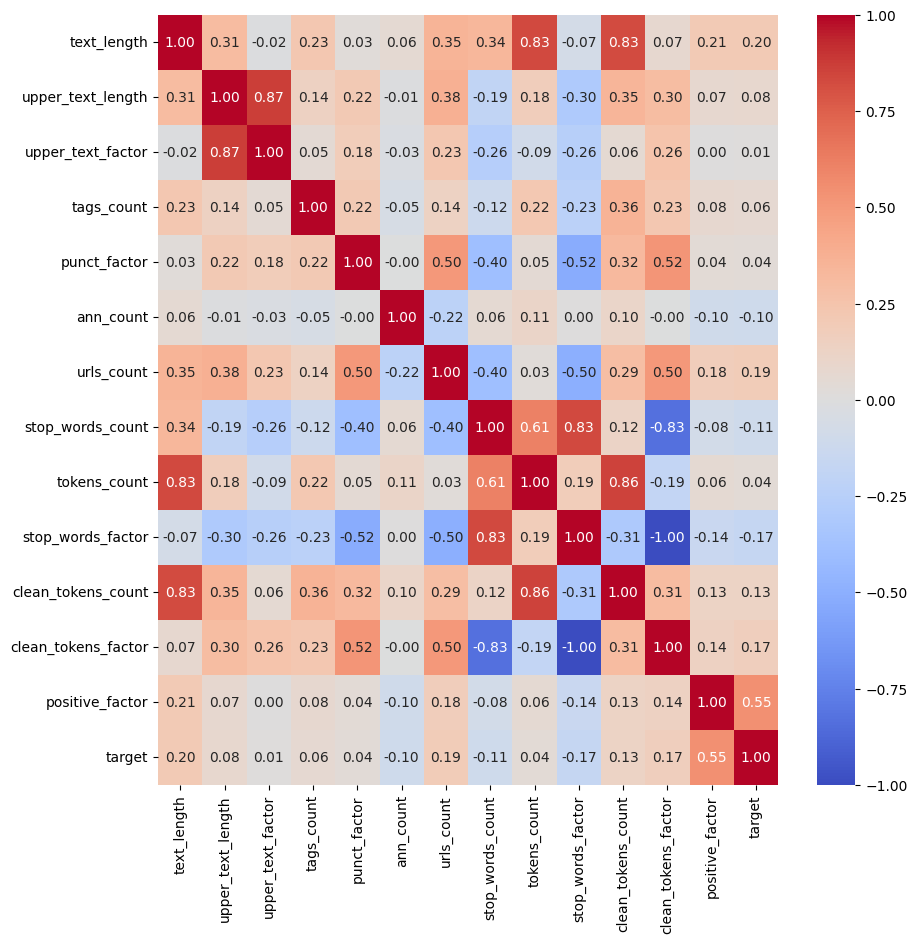

In [107]:
selected_features = ['text_length','upper_text_length', 'upper_text_factor', 'tags_count', 'punct_factor', 'ann_count', 'urls_count',
                     'stop_words_count', 'tokens_count', 'stop_words_factor', 'clean_tokens_count', 'clean_tokens_factor', 'positive_factor',
                     'target']
df_corr = df_train_new[selected_features].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=df_corr.columns, yticklabels=df_corr.columns)
plt.show()

In [108]:
save_features = ['id', 'keyword', 'location', 'text', 
                 'clean_text', 
                 'text_length', 'upper_text_factor', 'tags_count', 'punct_factor', 'ann_count', 'urls_count',
                 'stop_words_factor', 'clean_tokens_factor', 
                 'positive_factor',
                 'target']

df_train_new[save_features].to_csv('./train_preprocessed.csv')